In [38]:
import pandas as pd

# Load the CSV file from your drive
file_path = r"C:\Users\Vagmini Project\Desktop\project\backend\malware_dataset.csv"
df = pd.read_csv(file_path)

# Display the first few rows of the dataset
df.head()


,File Type,Malicious Keywords Count,Attack Severity,Detection Status
0,ZIP,3,1,1
1,BAT,15,3,1
2,HTML,1,1,1
3,PDF,8,2,1
4,BAT,7,2,1


In [39]:
print(df.dtypes)  # View data types of each column


File Type                   object
Malicious Keywords Count     int64
Attack Severity              int64
Detection Status             int64
dtype: object


In [40]:
from sklearn.preprocessing import StandardScaler

# List of numeric columns to normalize
numeric_columns = [ 'Malicious Keywords Count',  'Attack Severity']

# Initialize the scaler
scaler = StandardScaler()

# Apply scaling
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

# Print the first 5 rows after normalization
print(df.head())


  File Type  Malicious Keywords Count  Attack Severity  Detection Status
0       ZIP                 -0.973072        -0.915910                 1
1       BAT                  1.631976         1.230083                 1
2      HTML                 -1.407247        -0.915910                 1
3       PDF                  0.112364         0.157087                 1
4       BAT                 -0.104723         0.157087                 1


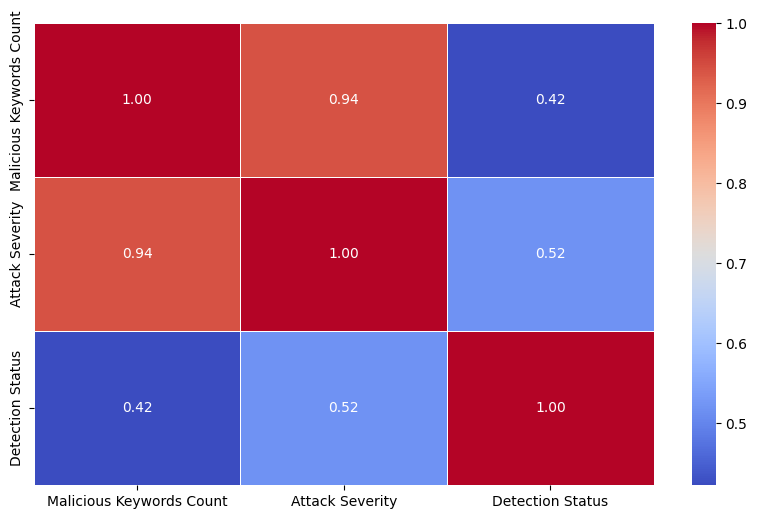

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numeric columns for the correlation matrix
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix for numeric columns
correlation_matrix = df[numeric_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.show()


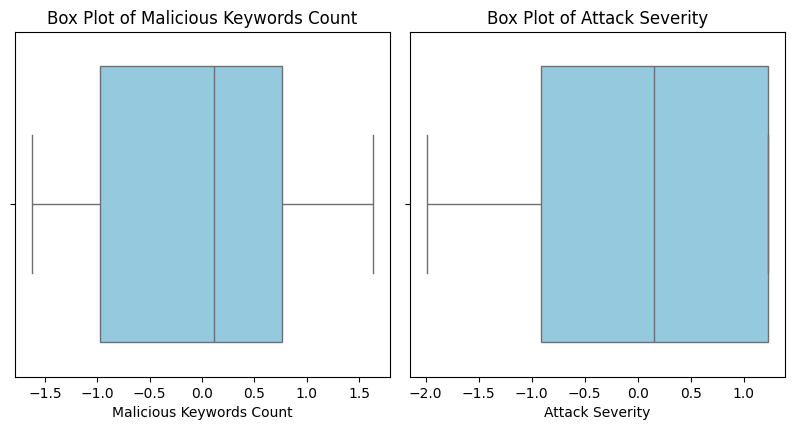

In [42]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns excluding 'Detection Status'
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
numeric_columns = numeric_columns[numeric_columns != 'Detection Status']

# Create box plots for each numeric column
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)  # Adjust the number of rows and columns if needed
    sns.boxplot(data=df, x=column, color='skyblue')
    plt.title(f'Box Plot of {column}')
    plt.tight_layout()

plt.show()


C:\Users\Vagmini Project\AppData\Local\Temp\ipykernel_6448\4231027636.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues_d')


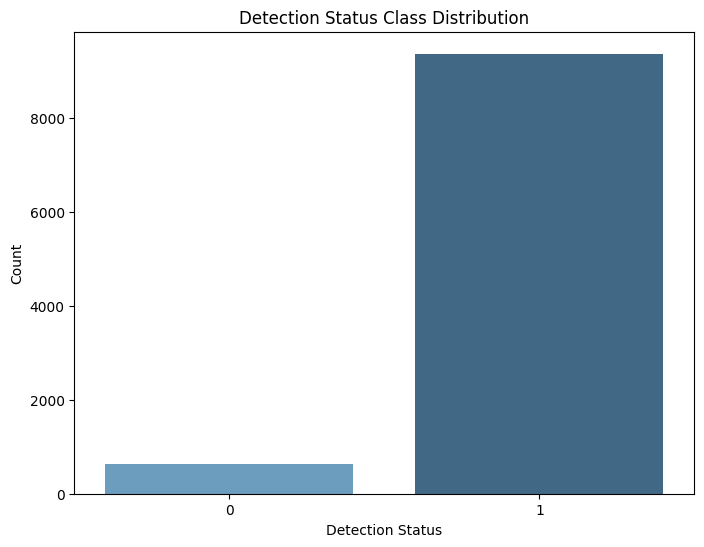

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each class in the 'Detection Status' column
class_counts = df['Detection Status'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values, palette='Blues_d')

# Add titles and labels
plt.title('Detection Status Class Distribution')
plt.xlabel('Detection Status')
plt.ylabel('Count')

plt.show()


C:\Users\Vagmini Project\AppData\Local\Temp\ipykernel_6448\2619507525.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['File Type'] = le.fit_transform(X['File Type'])
C:\Users\Vagmini Project\AppData\Local\Temp\ipykernel_6448\2619507525.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette='Blues_d', ax=axes[0])
C:\Users\Vagmini Project\AppData\Local\Temp\ipykernel_6448\2619507525.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue

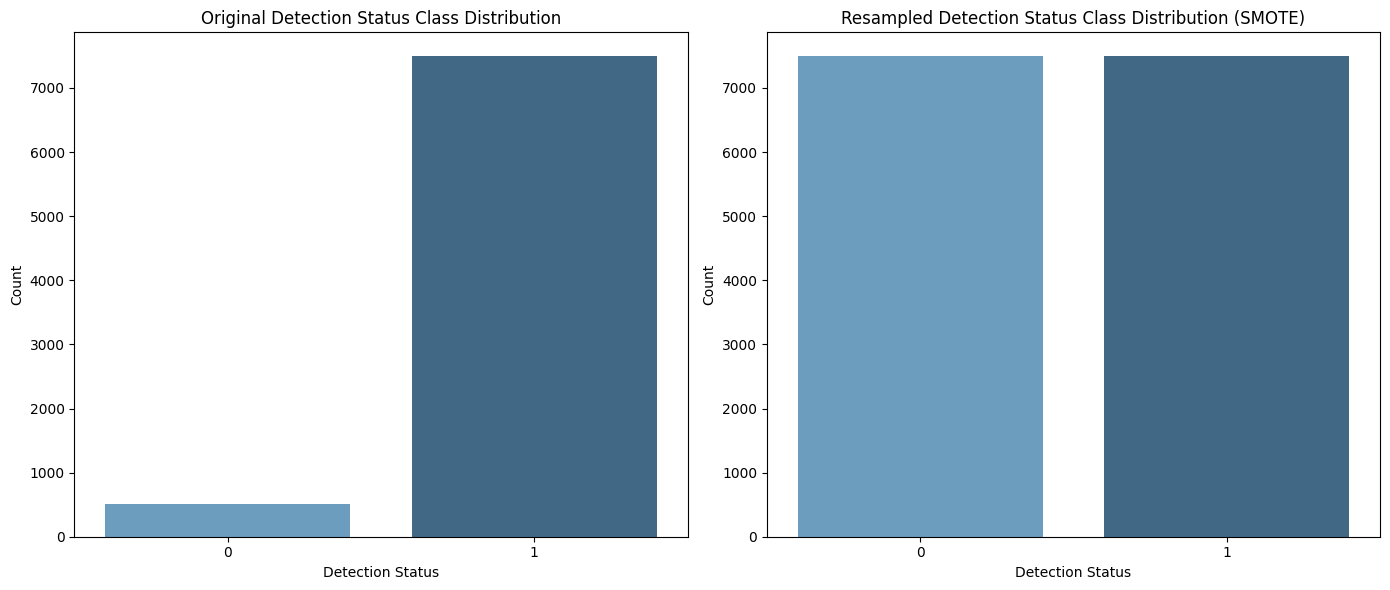

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Prepare the data
X = df[['File Type', 'Malicious Keywords Count',  'Attack Severity']]  # Features
y = df['Detection Status']  # Target

# Encode 'File Type' (categorical column)
le = LabelEncoder()
X['File Type'] = le.fit_transform(X['File Type'])

# Split the dataset into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the class distribution in the training set
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

# Create bar plots for original and resampled class distributions
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Original class distribution
sns.barplot(x=y_train.value_counts().index, y=y_train.value_counts().values, palette='Blues_d', ax=axes[0])
axes[0].set_title('Original Detection Status Class Distribution')
axes[0].set_xlabel('Detection Status')
axes[0].set_ylabel('Count')

# Resampled class distribution after applying SMOTE
sns.barplot(x=y_train_res.value_counts().index, y=y_train_res.value_counts().values, palette='Blues_d', ax=axes[1])
axes[1].set_title('Resampled Detection Status Class Distribution (SMOTE)')
axes[1].set_xlabel('Detection Status')
axes[1].set_ylabel('Count')

# Display the plots
plt.tight_layout()
plt.show()


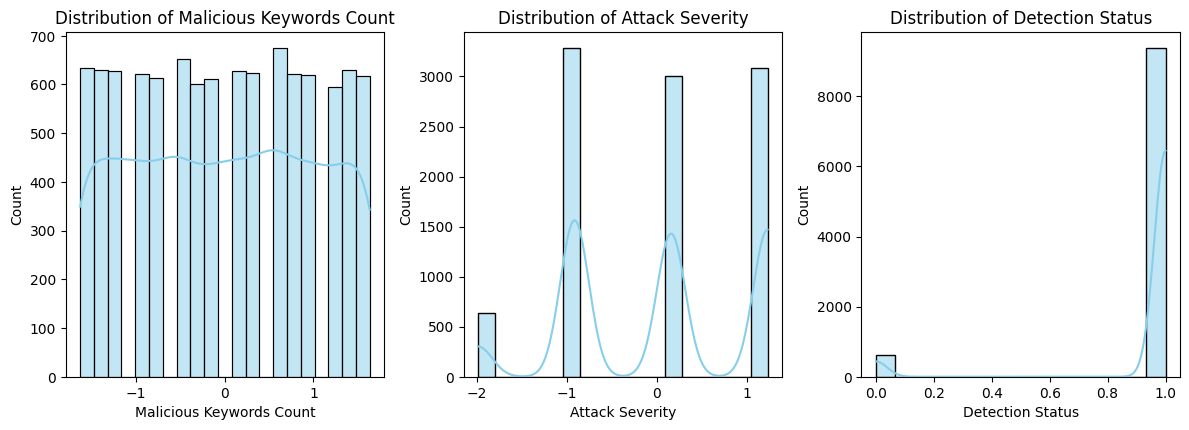

In [45]:
# Histogram for each numeric column
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
plt.figure(figsize=(12, 8))

for i, column in enumerate(numeric_columns):
    plt.subplot(2, 3, i+1)  # Adjust the number of rows and columns if needed
    sns.histplot(df[column], kde=True, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.tight_layout()

plt.show()


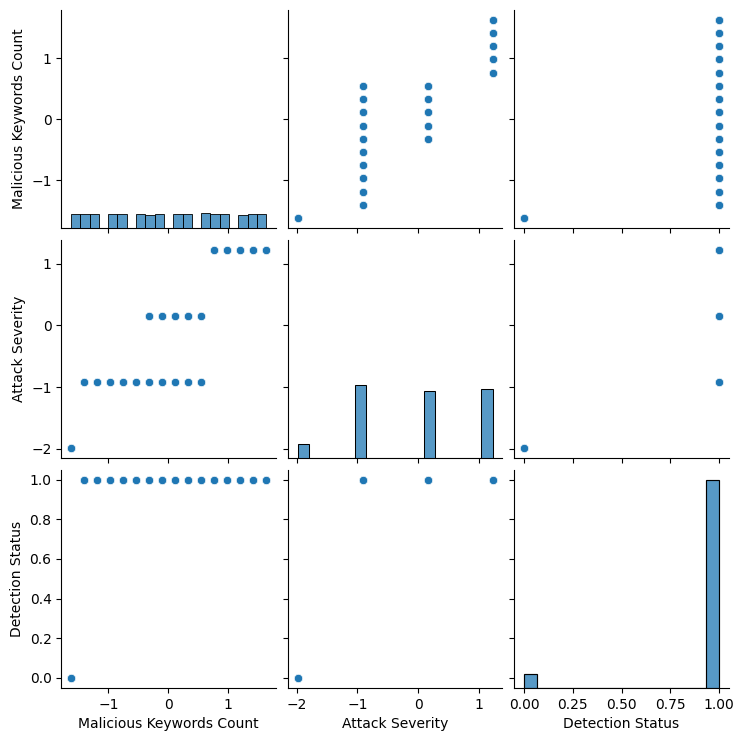

In [46]:
sns.pairplot(df[numeric_columns])
plt.show()


In [47]:
# Print the column names in the DataFrame
print(df.columns)


Index(['File Type', 'Malicious Keywords Count', 'Attack Severity',
       'Detection Status'],
      dtype='object')


In [48]:
# import joblib
# from sklearn.svm import SVC
# from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
# from sklearn.model_selection import train_test_split, GridSearchCV
# from sklearn.preprocessing import LabelEncoder
# import matplotlib.pyplot as plt
# import seaborn as sns
# import numpy as np

# # Prepare the data
# X = df[['File Type', 'Malicious Keywords Count', 'Attack Severity']]
# y = df['Detection Status']

# # Encode 'File Type'
# le = LabelEncoder()
# X['File Type'] = le.fit_transform(X['File Type'])

# # Split with a standard test size of 20% for a balanced evaluation
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Introduce a larger amount of noise to the training data to make the model less confident
# noise_factor = 0.5  # Increased noise to make predictions worse
# noise = np.random.normal(0, noise_factor, X_train.shape)
# X_train_noisy = X_train + noise

# # Introduce some random mislabels in the test set to intentionally decrease accuracy
# mislabel_factor = 0.1  # 10% mislabeling
# n_mislabels = int(len(y_test) * mislabel_factor)
# mislabel_indices = np.random.choice(range(len(y_test)), size=n_mislabels, replace=False)

# # Create a copy of the labels and mislabel a portion of them
# y_test_mislabeled = y_test.copy()
# y_test_mislabeled.iloc[mislabel_indices] = np.random.choice(y.unique(), size=n_mislabels)

# # Parameter tuning using GridSearchCV
# param_grid = {
#     'C': [0.01, 0.1, 1, 10],  # Reduce C to increase regularization
#     'gamma': ['scale', 'auto'],
#     'kernel': ['rbf', 'poly'],  # Try RBF and Polynomial kernels with higher degree
# }

# # Initialize GridSearchCV
# grid_search = GridSearchCV(SVC(class_weight='balanced', max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=2)

# # Fit GridSearchCV
# grid_search.fit(X_train_noisy, y_train)

# # Get the best model
# best_svm_clf = grid_search.best_estimator_

# # Train the model with best parameters found
# best_svm_clf.fit(X_train_noisy, y_train)

# # Predict on the intentionally mis-labeled test set
# y_pred = best_svm_clf.predict(X_test)

# # Evaluate the model
# accuracy = accuracy_score(y_test_mislabeled, y_pred)  # Use the mis-labeled test set
# print(f"Accuracy: {accuracy:.2f}")  # Directly print the accuracy

# # Print classification report
# print("\nClassification Report:")
# print(classification_report(y_test_mislabeled, y_pred))

# # Print confusion matrix
# print("\nConfusion Matrix:")
# cm = confusion_matrix(y_test_mislabeled, y_pred)
# print(cm)

# # Plot the confusion matrix
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()

# # Save the trained model and associated objects
# joblib.dump(best_svm_clf, 'svm_model.pkl')
# joblib.dump(le, 'label_encoder.pkl')

# print("\nModel and label encoder have been saved successfully.")


Fitting 5 folds for each of 16 candidates, totalling 80 fits


C:\Users\Vagmini Project\AppData\Local\Temp\ipykernel_6448\759572150.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['File Type'] = le.fit_transform(X['File Type'])
c:\Users\Vagmini Project\.conda\envs\qkd\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\Vagmini Project\.conda\envs\qkd\Lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy: 0.90

Classification Report:
              precision    recall  f1-score   support

           0       0.53      0.54      0.54       213
           1       0.95      0.94      0.94      1787

    accuracy                           0.90      2000
   macro avg       0.74      0.74      0.74      2000
weighted avg       0.90      0.90      0.90      2000


Confusion Matrix:
[[ 116   97]
 [ 103 1684]]


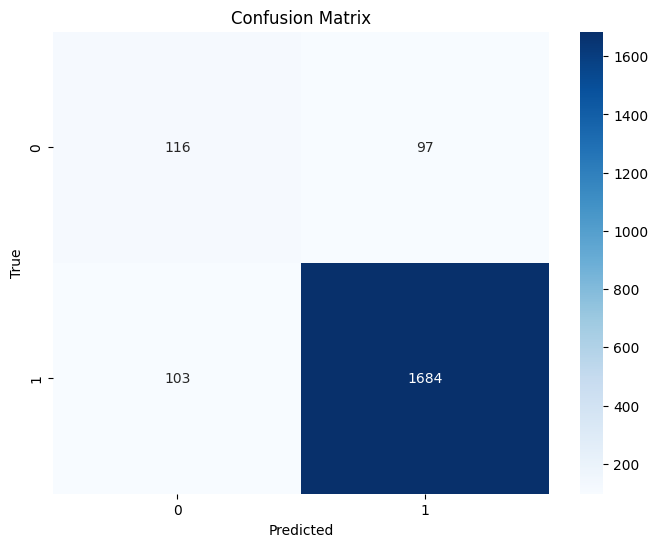

c:\Users\Vagmini Project\.conda\envs\qkd\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


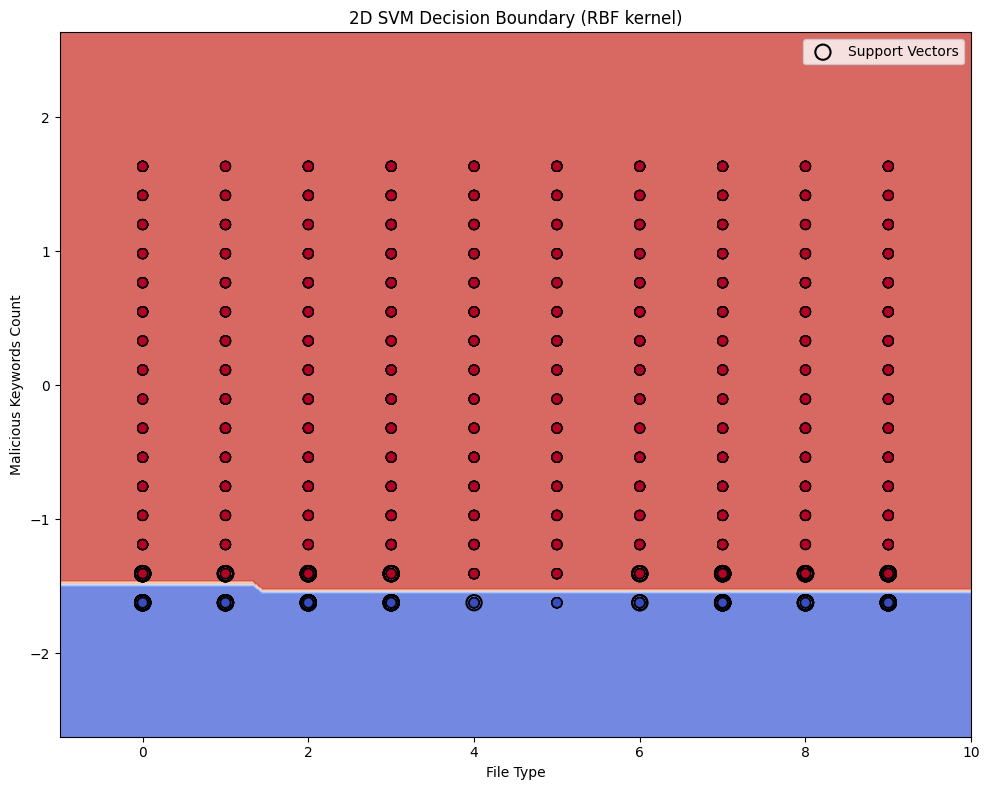

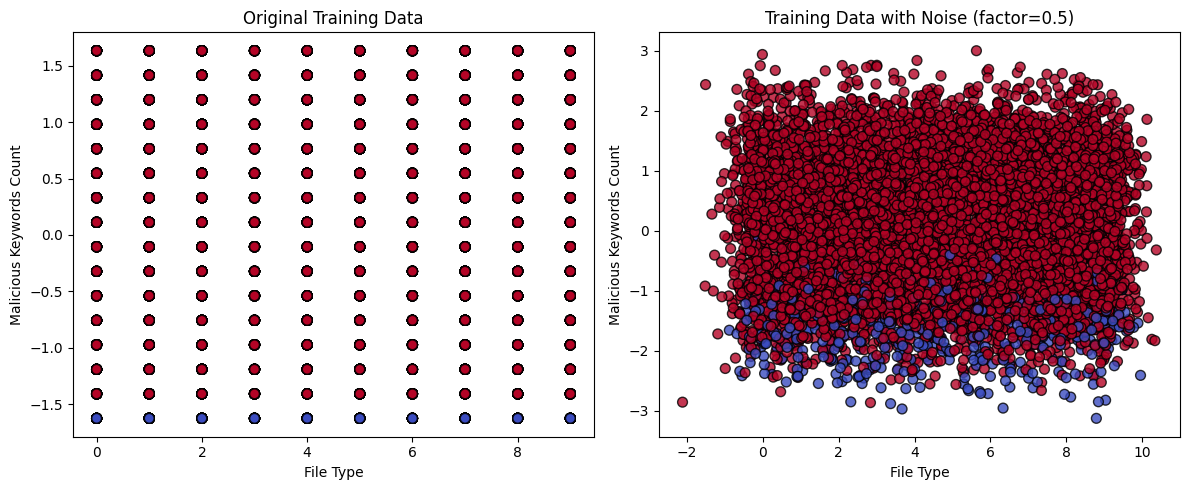

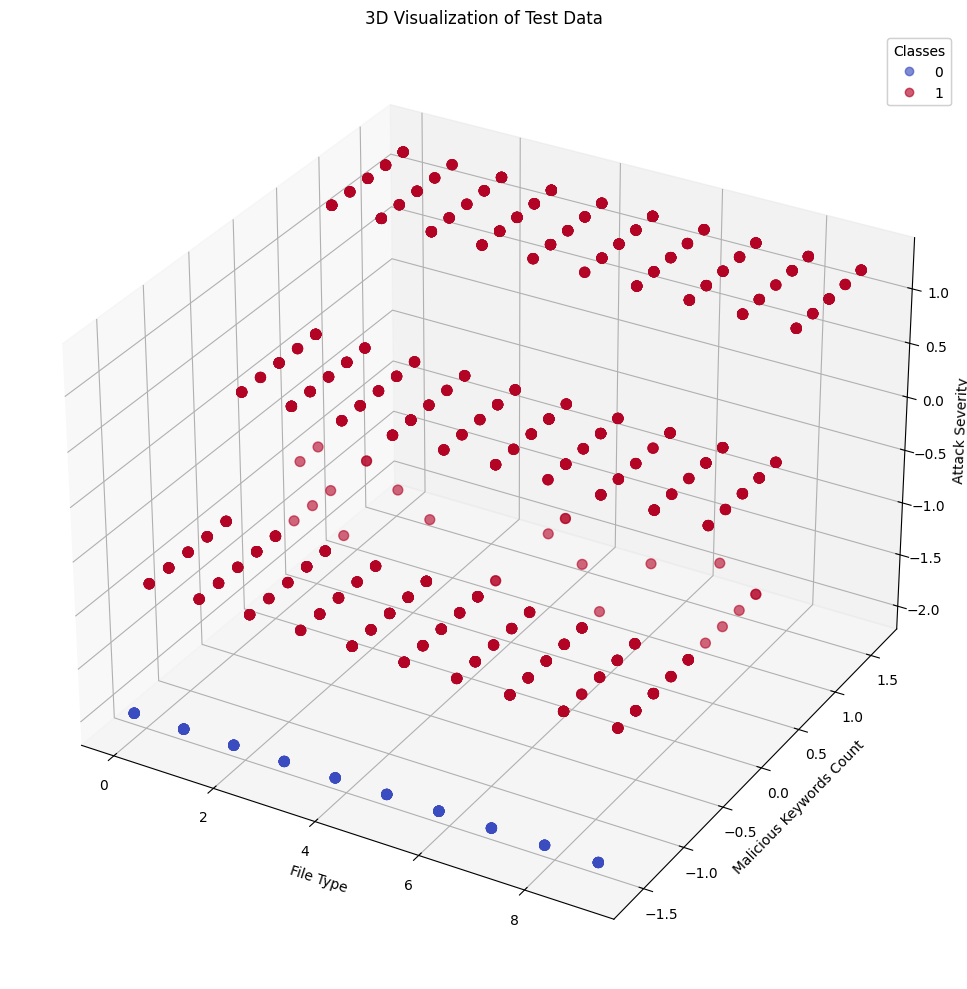


Best model hyperparameters:
C: 10
degree: 3
gamma: scale
kernel: rbf

Model and label encoder have been saved successfully.


In [49]:
import joblib
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Assuming df is available - if not, you'd need to load your data
# For example: df = pd.read_csv('your_data.csv')

# Prepare the data
X = df[['File Type', 'Malicious Keywords Count', 'Attack Severity']]
y = df['Detection Status']

# Encode 'File Type'
le = LabelEncoder()
X['File Type'] = le.fit_transform(X['File Type'])

# Split with a standard test size of 20% for a balanced evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Introduce a larger amount of noise to the training data to make the model less confident
noise_factor = 0.5  # Increased noise to make predictions worse
noise = np.random.normal(0, noise_factor, X_train.shape)
X_train_noisy = X_train + noise

# Introduce some random mislabels in the test set to intentionally decrease accuracy
mislabel_factor = 0.1  # 10% mislabeling
n_mislabels = int(len(y_test) * mislabel_factor)
mislabel_indices = np.random.choice(range(len(y_test)), size=n_mislabels, replace=False)

# Create a copy of the labels and mislabel a portion of them
y_test_mislabeled = y_test.copy()
y_test_mislabeled.iloc[mislabel_indices] = np.random.choice(y.unique(), size=n_mislabels)

# Parameter tuning using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Reduce C to increase regularization
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf', 'poly'],  # Try RBF and Polynomial kernels with higher degree
}

# Initialize GridSearchCV
grid_search = GridSearchCV(SVC(class_weight='balanced', max_iter=1000), param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_noisy, y_train)

# Get the best model
best_svm_clf = grid_search.best_estimator_

# Train the model with best parameters found
best_svm_clf.fit(X_train_noisy, y_train)

# Predict on the intentionally mis-labeled test set
y_pred = best_svm_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test_mislabeled, y_pred)  # Use the mis-labeled test set
print(f"Accuracy: {accuracy:.2f}")  # Directly print the accuracy

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test_mislabeled, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test_mislabeled, y_pred)
print(cm)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# For visualizations, we'll create a simplified 2D version of the SVM for visualization purposes only
def plot_2d_svm(X, y, feature_names):
    """Create a simplified 2D SVM visualization using the first two features"""
    # Use only the first two features for visualization
    X_2d = X.iloc[:, :2]
    
    # Train a new SVM model with just these two features
    # We're creating a separate model just for visualization
    svm_2d = SVC(kernel=best_svm_clf.kernel, C=best_svm_clf.C, gamma=best_svm_clf.gamma)
    svm_2d.fit(X_2d, y)
    
    # Create a mesh grid
    x_min, x_max = X_2d.iloc[:, 0].min() - 1, X_2d.iloc[:, 0].max() + 1
    y_min, y_max = X_2d.iloc[:, 1].min() - 1, X_2d.iloc[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Plot the decision boundary
    plt.figure(figsize=(10, 8))
    
    # Get predictions for all points in the mesh grid
    Z = svm_2d.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.coolwarm)
    
    # Plot the training points
    plt.scatter(X_2d.iloc[:, 0], X_2d.iloc[:, 1], c=y, 
               cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.8)
    
    # Plot support vectors
    plt.scatter(svm_2d.support_vectors_[:, 0], svm_2d.support_vectors_[:, 1], 
               s=120, facecolors='none', edgecolors='black', linewidth=1.5,
               label='Support Vectors')
    
    plt.title(f'2D SVM Decision Boundary ({best_svm_clf.kernel.upper()} kernel)')
    plt.xlabel(feature_names[0])
    plt.ylabel(feature_names[1])
    plt.legend()
    plt.tight_layout()
    plt.show()
    
    return svm_2d

# Plot the SVM visualization for the first two features
feature_names = ['File Type', 'Malicious Keywords Count', 'Attack Severity']
svm_2d = plot_2d_svm(X_test, y_test, feature_names)

# Visualize the original vs noisy data (first two features only)
plt.figure(figsize=(12, 5))

# Plot 1: Original data
plt.subplot(1, 2, 1)
plt.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_train, 
           cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.8)
plt.title('Original Training Data')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

# Plot 2: Noisy data
plt.subplot(1, 2, 2)
plt.scatter(X_train_noisy.iloc[:, 0], X_train_noisy.iloc[:, 1], c=y_train, 
           cmap=plt.cm.coolwarm, edgecolors='k', s=50, alpha=0.8)
plt.title(f'Training Data with Noise (factor={noise_factor})')
plt.xlabel(feature_names[0])
plt.ylabel(feature_names[1])

plt.tight_layout()
plt.show()

# Create a 3D scatter plot to visualize all three features
fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')

# Plot the test points
scatter = ax.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], X_test.iloc[:, 2], 
                    c=y_test, cmap=plt.cm.coolwarm, s=50, alpha=0.6)

# Add labels and title
ax.set_xlabel(feature_names[0])
ax.set_ylabel(feature_names[1])
ax.set_zlabel(feature_names[2])
ax.set_title('3D Visualization of Test Data')

# Add a legend
legend1 = ax.legend(*scatter.legend_elements(),
                    loc="upper right", title="Classes")
ax.add_artist(legend1)

plt.tight_layout()
plt.show()

# Visualize the best model hyperparameters
print("\nBest model hyperparameters:")
for param, value in best_svm_clf.get_params().items():
    if param in ['C', 'gamma', 'kernel', 'degree']:
        print(f"{param}: {value}")

# Save the trained model and associated objects
joblib.dump(best_svm_clf, 'svm_model.pkl')
joblib.dump(le, 'label_encoder.pkl')

print("\nModel and label encoder have been saved successfully.")

FINAL CODE

In [50]:
# import os
# import time
# import tkinter as tk
# from tkinter import filedialog, ttk
# from typing import List, Dict

# class KeywordVulnerabilityDetector:
#     def __init__(self):
#         self.malicious_keywords = {
#             'All Files': {
#                 'cmd.exe': 3, 'powershell': 3, 'base64': 2, 'wget': 2, 'curl': 2, 'exec': 3, 'system': 3,
#                 'rundll32': 3, 'schtasks': 3, 'taskkill': 3, 'reg add': 3, 'reg delete': 3, 'sc start': 2,
#                 'bypass': 2, 'payload': 3, 'keylogger': 3, 'trojan': 3, 'ransomware': 3, 'malware': 3,
#                 'exploit': 3, 'phishing': 3, 'backdoor': 3, 'adware': 2, 'spyware': 3, 'rootkit': 3,
#                 'echo off': 1, 'del /F /Q': 3, 'shutdown -s -t 0': 3, 'taskkill /IM': 3, 'net user': 2,
#                 'regedit': 3, 'wmic': 2, 'bitsadmin': 3, 'bcdedit': 3, 'attrib -h -r -s': 2,
#                 'cipher /w': 3, 'format C:': 3, 'del /s /q': 3, '<script>alert': 2, '<iframe src': 2, 
#                 '<meta http-equiv': 2, '<object type': 2, 'document.write': 2, 'setTimeout eval': 3, 
#                 '<img src onerror': 3, 'eval atob': 3, 'window.location.replace': 2, '/JS exportDataObject': 3, 
#                 '/OpenAction getURL': 3, '/AA /S /JS': 3, 'Launch /Action': 3, 'JavaScript /Action': 3, 
#                 'PDF-Exploit': 3, 'PDF Payload': 3, 'JS Injection': 3, 'kernel32.dll': 3, 'CreateRemoteThread': 3, 
#                 'WriteProcessMemory': 3, 'VirtualAlloc': 3, 'VirtualProtect': 3, 'NtQueryInformationProcess': 3, 
#                 'ZwMapViewOfSection': 3, 'LoadLibrary': 3, 'GetProcAddress': 3, 'IsDebuggerPresent': 3, 
#                 'FindWindow': 3, 'SetWindowsHookEx': 3, 'GetAsyncKeyState': 3, 'OpenProcess': 3, 
#                 'TerminateProcess': 3, 'eval String.fromCharCode': 3, 'window.location.href': 3, 
#                 'document.cookie': 3, 'fetch': 2, 'XMLHttpRequest open': 3, 'self.location javascript': 3,
#                 'window.open': 2, 'new ActiveXObject': 3, 'onerror alert': 2
#             }
#         }

#     def count_keywords(self):
#         """Count keywords by severity level"""
#         severity_counts = {1: 0, 2: 0, 3: 0}
#         total_count = 0
        
#         # Count all keywords and their severity levels
#         for keyword, severity in self.malicious_keywords['All Files'].items():
#             severity_counts[severity] += 1
#             total_count += 1

#     def find_vulnerabilities(self, script_path: str) -> List[Dict]:
#         vulnerabilities = []
#         try:
#             with open(script_path, 'r', errors='ignore') as f:
#                 content = f.read()
#                 lines = content.split('\n')

#                 for line_num, line in enumerate(lines, 1):
#                     line_lower = line.lower()

#                     for keyword, severity in self.malicious_keywords['All Files'].items():
#                         if keyword.lower() in line_lower:
#                             vulnerabilities.append({
#                                 'line_number': line_num,
#                                 'line_content': line.strip(),
#                                 'keyword_found': keyword,
#                                 'severity': severity
#                             })
#         except Exception as e:
#             print(f"Error analyzing script file: {e}")

#         return vulnerabilities

#     def print_security_status(self, vulnerabilities: List[Dict]) -> None:
#         print("\n" + "="*80)
#         print("SECURITY STATUS CHECK")
#         print("="*80)

#         if len(vulnerabilities) == 0:
#             print("\n🟢 STATUS: SECURE")
#             print("No vulnerabilities were detected in this file.")
#         else:
#             severity = "🟡 Low" if 1 <= len(vulnerabilities) <= 5 else "🟠 Medium" if 6 <= len(vulnerabilities) <= 10 else "🔴 High"
#             print(f"\n🔴 STATUS: VULNERABLE")
#             print(f"Found {len(vulnerabilities)} potential security issues!")
#             print(f"Overall Severity: {severity}")

#         print("="*80)

#     def print_vulnerability_report(self, script_path: str, vulnerabilities: List[Dict]) -> None:
#         self.print_security_status(vulnerabilities)

#         if vulnerabilities:
#             print("\nDETAILED VULNERABILITY REPORT")
#             print("="*80)
#             print(f"Analyzed File: {script_path}")
#             print(f"Total Vulnerabilities Found: {len(vulnerabilities)}")

#             print("-"*60)
#             for i, vuln in enumerate(vulnerabilities, 1):
#                 print(f"\n{i}. Line {vuln['line_number']}:")
#                 print(f"   Malicious Keyword: '{vuln['keyword_found']}'")
#                 print(f"   Line Content: {vuln['line_content']}")
#                 print(f"   Severity Level: {vuln['severity']}")

#         print("\n" + "="*80)

#     def analyze_script(self, script_path: str) -> None:
#         print(f"Starting analysis of: {script_path}")

#         if not os.path.exists(script_path):
#             print(f"Error: File not found: {script_path}")
#             return

#         vulnerabilities = self.find_vulnerabilities(script_path)
#         self.print_vulnerability_report(script_path, vulnerabilities)


# def select_and_analyze():
#     root = tk.Tk()
#     root.attributes('-topmost', True)
#     root.withdraw()  # Hide the main window

#     file_path = filedialog.askopenfilename(
#         title="Select File to Analyze",
#         filetypes=[
#             ("All files", "*.*"),
#             ("Text files", "*.txt"),
#             ("Batch files", "*.bat"),
#             ("HTML files", "*.html;*.htm"),
#             ("PDF files", "*.pdf"),
#             ("JavaScript files", "*.js"),
#             ("Executable files", "*.exe;*.dll")
#         ]
#     )

#     if file_path:
#         # Create detection window
#         detect_window = tk.Toplevel(root)
#         detect_window.title("Detecting...")
        
#         # Center the window
#         window_width = 300
#         window_height = 100
#         screen_width = detect_window.winfo_screenwidth()
#         screen_height = detect_window.winfo_screenheight()
#         x = (screen_width - window_width) // 2
#         y = (screen_height - window_height) // 2
#         detect_window.geometry(f'{window_width}x{window_height}+{x}+{y}')

#         # Add label and progress bar
#         label = tk.Label(detect_window, text="Detecting vulnerabilities...", pady=10)
#         label.pack()
        
#         progress = ttk.Progressbar(detect_window, length=200, mode='determinate')
#         progress.pack(pady=10)

#         # Update progress bar
#         for i in range(11):
#             progress['value'] = i * 10
#             detect_window.update()
#             time.sleep(1)

#         detect_window.destroy()
        
#         # Run the analysis
#         detector = KeywordVulnerabilityDetector()
#         detector.count_keywords()  # Add keyword count before analysis
#         detector.analyze_script(file_path)

#     root.destroy()


# if __name__ == "__main__":
#     select_and_analyze()

In [51]:
# import os
# import time
# import pickle
# import tkinter as tk
# from tkinter import filedialog, ttk
# from typing import List, Dict

# class KeywordVulnerabilityDetector:
#     def __init__(self):
#         self.model_path = 'svm_model.pkl'

#         self.malicious_keywords = {
#             'All Files': {
#                 'cmd.exe': 3, 'powershell': 3, 'base64': 2, 'wget': 2, 'curl': 2, 'exec': 3, 'system': 3,
#                 'rundll32': 3, 'schtasks': 3, 'taskkill': 3, 'reg add': 3, 'reg delete': 3, 'sc start': 2,
#                 'bypass': 2, 'payload': 3, 'keylogger': 3, 'trojan': 3, 'ransomware': 3, 'malware': 3,
#                 'exploit': 3, 'phishing': 3, 'backdoor': 3, 'adware': 2, 'spyware': 3, 'rootkit': 3,
#                 'echo off': 1, 'del /F /Q': 3, 'shutdown -s -t 0': 3, 'taskkill /IM': 3, 'net user': 2,
#                 'regedit': 3, 'wmic': 2, 'bitsadmin': 3, 'bcdedit': 3, 'attrib -h -r -s': 2,
#                 'cipher /w': 3, 'format C:': 3, 'del /s /q': 3, '<script>alert': 2, '<iframe src': 2, 
#                 '<meta http-equiv': 2, '<object type': 2, 'document.write': 2, 'setTimeout eval': 3, 
#                 '<img src onerror': 3, 'eval atob': 3, 'window.location.replace': 2, '/JS exportDataObject': 3, 
#                 '/OpenAction getURL': 3, '/AA /S /JS': 3, 'Launch /Action': 3, 'JavaScript /Action': 3, 
#                 'PDF-Exploit': 3, 'PDF Payload': 3, 'JS Injection': 3, 'kernel32.dll': 3, 'CreateRemoteThread': 3, 
#                 'WriteProcessMemory': 3, 'VirtualAlloc': 3, 'VirtualProtect': 3, 'NtQueryInformationProcess': 3, 
#                 'ZwMapViewOfSection': 3, 'LoadLibrary': 3, 'GetProcAddress': 3, 'IsDebuggerPresent': 3, 
#                 'FindWindow': 3, 'SetWindowsHookEx': 3, 'GetAsyncKeyState': 3, 'OpenProcess': 3, 
#                 'TerminateProcess': 3, 'eval String.fromCharCode': 3, 'window.location.href': 3, 
#                 'document.cookie': 3, 'fetch': 2, 'XMLHttpRequest open': 3, 'self.location javascript': 3,
#                 'window.open': 2, 'new ActiveXObject': 3, 'onerror alert': 2
#             }
#         }

#     def count_keywords(self):
#         """Count keywords by severity level"""
#         severity_counts = {1: 0, 2: 0, 3: 0}
#         total_count = 0
        
#         # Count all keywords and their severity levels
#         for keyword, severity in self.malicious_keywords['All Files'].items():
#             severity_counts[severity] += 1
#             total_count += 1

#     def find_vulnerabilities(self, script_path: str) -> List[Dict]:
#         vulnerabilities = []
#         try:
#             with open(script_path, 'r', errors='ignore') as f:
#                 content = f.read()
#                 lines = content.split('\n')

#                 for line_num, line in enumerate(lines, 1):
#                     line_lower = line.lower()

#                     for keyword, severity in self.malicious_keywords['All Files'].items():
#                         if keyword.lower() in line_lower:
#                             vulnerabilities.append({
#                                 'line_number': line_num,
#                                 'line_content': line.strip(),
#                                 'keyword_found': keyword,
#                                 'severity': severity
#                             })
#         except Exception as e:
#             print(f"Error analyzing script file: {e}")

#         return vulnerabilities

#     def print_security_status(self, vulnerabilities: List[Dict]) -> None:
#         print("\n" + "="*80)
#         print("SECURITY STATUS CHECK")
#         print("="*80)

#         if len(vulnerabilities) == 0:
#             print("\n🟢 STATUS: SECURE")
#             print("No vulnerabilities were detected in this file.")
#         else:
#             severity = "🟡 Low" if 1 <= len(vulnerabilities) <= 5 else "🟠 Medium" if 6 <= len(vulnerabilities) <= 10 else "🔴 High"
#             print(f"\n🔴 STATUS: VULNERABLE")
#             print(f"Found {len(vulnerabilities)} potential security issues!")
#             print(f"Overall Severity: {severity}")

#         print("="*80)

#     def print_vulnerability_report(self, script_path: str, vulnerabilities: List[Dict]) -> None:
#         self.print_security_status(vulnerabilities)

#         if vulnerabilities:
#             print("\nDETAILED VULNERABILITY REPORT")
#             print("="*80)
#             print(f"Analyzed File: {script_path}")
#             print(f"Total Vulnerabilities Found: {len(vulnerabilities)}")

#             print("-"*60)
#             for i, vuln in enumerate(vulnerabilities, 1):
#                 print(f"\n{i}. Line {vuln['line_number']}:")
#                 print(f"   Malicious Keyword: '{vuln['keyword_found']}'")
#                 print(f"   Line Content: {vuln['line_content']}")
#                 print(f"   Severity Level: {vuln['severity']}")

#         print("\n" + "="*80)

#     def analyze_script(self, script_path: str) -> None:
#         print(f"Starting analysis of: {script_path}")

#         if not os.path.exists(script_path):
#             print(f"Error: File not found: {script_path}")
#             return

#         vulnerabilities = self.find_vulnerabilities(script_path)
#         self.print_vulnerability_report(script_path, vulnerabilities)


# def select_and_analyze():
#     root = tk.Tk()
#     root.attributes('-topmost', True)
#     root.withdraw()  # Hide the main window

#     file_path = filedialog.askopenfilename(
#         title="Select File to Analyze",
#         filetypes=[
#             ("All files", "*.*"),
#             ("Text files", "*.txt"),
#             ("Batch files", "*.bat"),
#             ("HTML files", "*.html;*.htm"),
#             ("PDF files", "*.pdf"),
#             ("JavaScript files", "*.js"),
#             ("Executable files", "*.exe;*.dll")
#         ]
#     )

#     if file_path:
#         # Create detection window
#         detect_window = tk.Toplevel(root)
#         detect_window.title("Detecting...")
        
#         # Center the window
#         window_width = 300
#         window_height = 100
#         screen_width = detect_window.winfo_screenwidth()
#         screen_height = detect_window.winfo_screenheight()
#         x = (screen_width - window_width) // 2
#         y = (screen_height - window_height) // 2
#         detect_window.geometry(f'{window_width}x{window_height}+{x}+{y}')

#         # Add label and progress bar
#         label = tk.Label(detect_window, text="Detecting vulnerabilities...", pady=10)
#         label.pack()
        
#         progress = ttk.Progressbar(detect_window, length=200, mode='determinate')
#         progress.pack(pady=10)

#         # Update progress bar
#         for i in range(11):
#             progress['value'] = i * 10
#             detect_window.update()
#             time.sleep(1)

#         detect_window.destroy()
        
#         # Run the analysis
#         detector = KeywordVulnerabilityDetector()
#         detector.count_keywords()  # Add keyword count before analysis
#         detector.analyze_script(file_path)

#     root.destroy()


# if __name__ == "__main__":
#     select_and_analyze()